In [1]:
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# READ 2
bioptort_metrics = [0.37, 0.43, 0.35] # bioptort-human pairwise concordance
readers_metrics = [0.34, 0.54, 0.41] # human-human pairwise concordance
alpha = 0.05


In [3]:
def calculate_margins(bioptort_metrics, readers_metrics, alpha=0.05):
    # Calculate the mean sensitivity of the Raters
    mean_readers_metrics = np.mean(readers_metrics)
    mean_bioptort_metrics = np.mean(bioptort_metrics)

    # Calculate the 95% CI for the mean human-human pairwise concordance
    ci_lower_humans, ci_upper_humans = sms.DescrStatsW(readers_metrics).tconfint_mean(alpha=alpha)

    # Calculate the 95% CI for the mean human-bioptort concordance
    ci_lower_bioptort, ci_upper_bioptort = sms.DescrStatsW(bioptort_metrics).tconfint_mean(alpha=alpha)
    
    return (mean_readers_metrics, (ci_lower_humans, ci_upper_humans), mean_bioptort_metrics, (ci_lower_bioptort, ci_upper_bioptort))

In [4]:
mean_humans, ci_humans, mean_BT, ci_BT = calculate_margins(bioptort_metrics, readers_metrics, alpha=alpha)
print(f"Difference in average concordance: {mean_BT - mean_humans}")
print(f"Mean human-human concordance: {mean_humans} {ci_humans}")
print(f"Mean human-bioptort concordance: {mean_BT} {ci_BT}")


Difference in average concordance: -0.04666666666666669
Mean human-human concordance: 0.43 (0.1778875572974145, 0.6821124427025855)
Mean human-bioptort concordance: 0.3833333333333333 (0.27991043307859853, 0.4867562335880681)


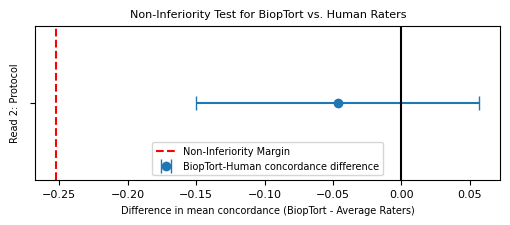

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 2)

plt.rc('axes', titlesize=8)     # Axes title size
plt.rc('axes', labelsize=7)     # Axes labels size
plt.rc('xtick', labelsize=7)    # X-tick labels size
plt.rc('ytick', labelsize=7)    # Y-tick labels size
plt.rc('legend', fontsize=7)    # Legend font size
# plt.rc('figure', titlesize=7)   # Figure title size

difference = mean_BT - mean_humans
yerr = np.abs((ci_BT[0] - ci_BT[1]) / 2)
non_inferiority_margin = (ci_humans[0] - ci_humans[1]) / 2

# Plot the difference and its CI, but invert the axes
ax.errorbar(difference, 1, xerr=yerr, fmt='o', capsize=5, label='BiopTort-Human concordance difference')

# Plot the non-inferiority margin
ax.axvline(x=non_inferiority_margin, color='r', linestyle='--', label='Non-Inferiority Margin')

ax.axvline(x=0, color='black', linestyle='-')

# Labels and title
ax.set_ylabel('Read 2: Protocol')
ax.set_xlabel('Difference in mean concordance (BiopTort - Average Raters)')
ax.set_title('Non-Inferiority Test for BiopTort vs. Human Raters')
ax.legend()

# Set y-axis ticks
ax.set_yticks([1])
ax.set_yticklabels([''])
bbox = matplotlib.transforms.Bbox([[0.4, -0.3], [5.5, 2]])
plt.savefig('figures/non_inferiority_test.png', dpi=600, bbox_inches=bbox, pad_inches=0.1)
plt.show()
